# SIPRI milex Data Exploration and Validation Notebook

This notebook performs a quality check and exploratory analysis on the tidy SIPRI military expenditure dataset. It will help to verify the data quality, identify trends, and detect outliers before integrating it into your interactive dashboard.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# This magic command ensures that plots are displayed inline within the notebook
%matplotlib inline

## 1. Load the Tidy Dataset

Load the tidy dataset (created from your wide-format data) into a DataFrame and preview it.

In [2]:
# Load the tidy dataset
df = pd.read_csv('../data/sipri_milex_data_tidy.csv')

# Display the first few rows to confirm the structure
print("Original DataFrame:")
print(df.head())

Original DataFrame:
                    Country  Year  Expenditure ISO_Code
0                    Mexico  1949        420.9      MEX
1  United States of America  1949     168952.5      USA
2                 Argentina  1949       5268.4      ARG
3                      Peru  1949        808.6      PER
4                   Belgium  1949       2203.2      BEL


## 2. Data Quality Check

Let's inspect the structure of the DataFrame, check data types, and look for any missing values.

In [3]:
# Display DataFrame information
print("DataFrame Info:")
df.info()

# Show descriptive statistics for numeric columns
print("\nDescriptive Statistics:")
print(df.describe())

# Check for missing values in each column
print("\nMissing Values by Column:")
print(df.isnull().sum())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8113 entries, 0 to 8112
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      8113 non-null   object 
 1   Year         8113 non-null   int64  
 2   Expenditure  8113 non-null   float64
 3   ISO_Code     8113 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 253.7+ KB

Descriptive Statistics:
              Year    Expenditure
count  8113.000000    8113.000000
mean   1994.427462   11248.852545
std      18.915341   64740.904999
min    1949.000000       0.000000
25%    1980.000000     111.100000
50%    1997.000000     764.200000
75%    2010.000000    4252.600000
max    2023.000000  990485.400000

Missing Values by Column:
Country        0
Year           0
Expenditure    0
ISO_Code       0
dtype: int64


## 3. Data Exploration & Visualization

### A. Overall Trend: Average Military Expenditure Over Time

We group the data by year and calculate the average expenditure to get an overall trend across all countries.

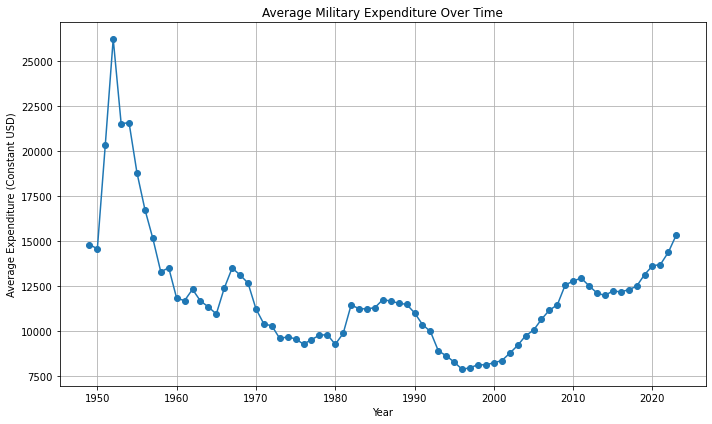

In [4]:
# Calculate average expenditure by year
avg_expenditure = df.groupby('Year')['Expenditure'].mean().reset_index()

# Plot the average military expenditure over time
plt.figure(figsize=(10, 6))
plt.plot(avg_expenditure['Year'], avg_expenditure['Expenditure'], marker='o')
plt.title("Average Military Expenditure Over Time")
plt.xlabel("Year")
plt.ylabel("Average Expenditure (Constant USD)")
plt.grid(True)
plt.tight_layout()
plt.show()

### B. Distribution of Expenditure Values

A histogram of the expenditure values provides insight into the overall distribution and helps identify any outliers.

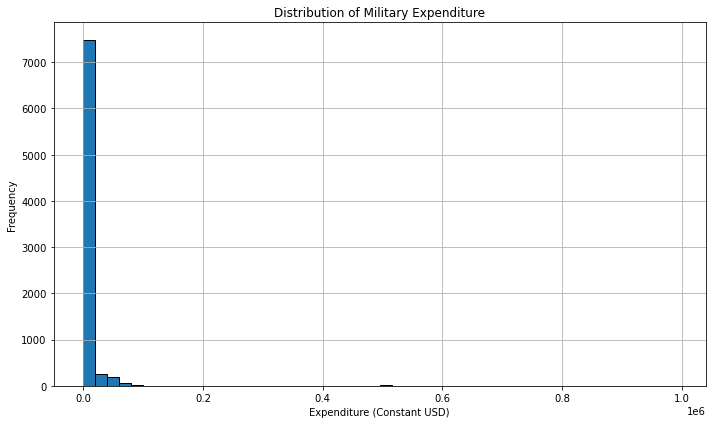

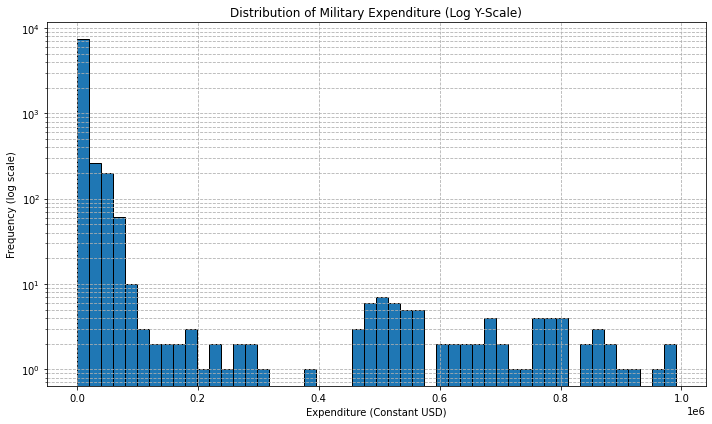

In [6]:
# Plot a histogram of expenditure values
plt.figure(figsize=(10, 6))
plt.hist(df['Expenditure'].dropna(), bins=50, edgecolor='black')
plt.title("Distribution of Military Expenditure")
plt.xlabel("Expenditure (Constant USD)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

# Drop missing values from the Expenditure column
expenditure = df['Expenditure'].dropna()

plt.figure(figsize=(10, 6))
plt.hist(expenditure, bins=50, edgecolor='black')
plt.yscale('log')  # Set the y-axis to a logarithmic scale
plt.title("Distribution of Military Expenditure (Log Y-Scale)")
plt.xlabel("Expenditure (Constant USD)")
plt.ylabel("Frequency (log scale)")
plt.grid(True, which='both', ls='--')
plt.tight_layout()
plt.show()


Histogram of values for a specific country (US)

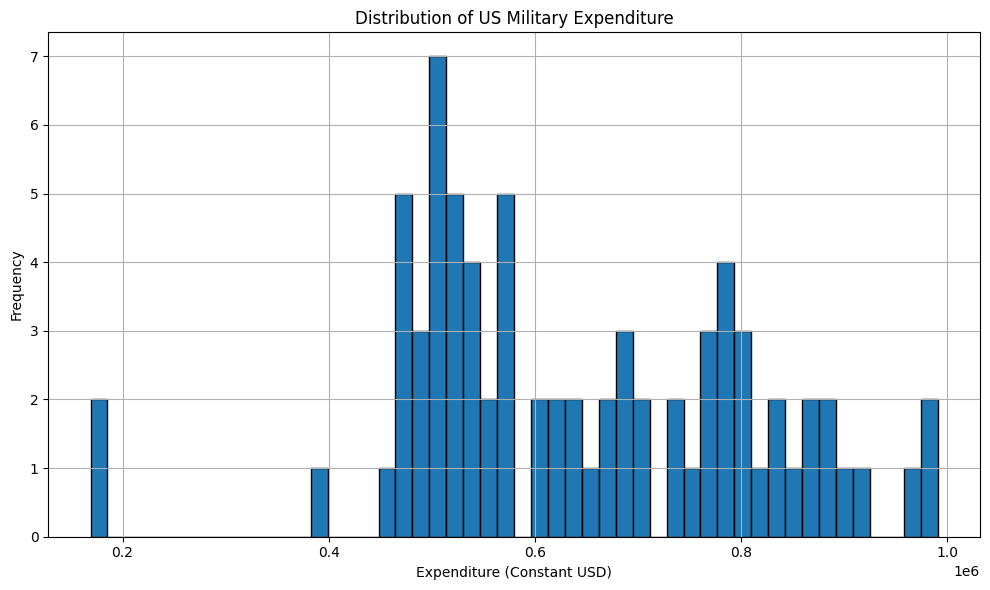

In [32]:
# Filter out US military expenditure data
us_expenditure = df[df['Country'] == 'United States of America']['Expenditure'].dropna()

# Plot a histogram of US expenditure values
plt.figure(figsize=(10, 6))
plt.hist(us_expenditure, bins=50, edgecolor='black')
plt.title("Distribution of US Military Expenditure")
plt.xlabel("Expenditure (Constant USD)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()



### C. Box Plot for Selected Years

Box plots for selected years (e.g., 1950, 1980, 2010, 2020) can help identify trends and detect outliers in specific periods.

/var/folders/30/gtq4w0td57s30yt1yqkcdn_m0000gn/T/ipykernel_31278/1852314149.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=selected_years, showfliers=False)


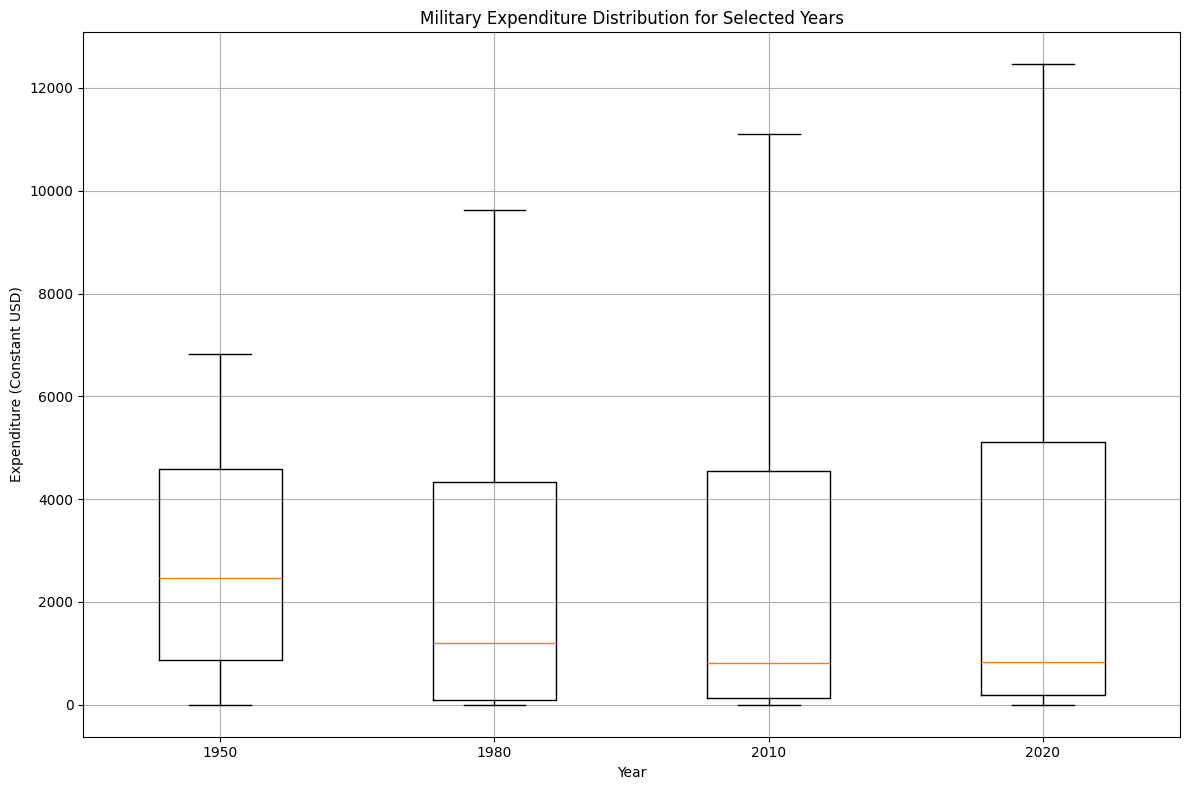

In [46]:
# Define selected years for clarity
selected_years = [1950, 1980, 2010, 2020]
subset = df[df['Year'].isin(selected_years)]
data_to_plot = [subset[subset['Year'] == yr]['Expenditure'].dropna() for yr in selected_years]

plt.figure(figsize=(12, 8))
plt.boxplot(data_to_plot, labels=selected_years, showfliers=False)
plt.title("Military Expenditure Distribution for Selected Years")
plt.xlabel("Year")
plt.ylabel("Expenditure (Constant USD)")
plt.grid(True)
plt.tight_layout()
plt.show()

### D. Time Series for a Specific Country

Let's examine the time series for a specific country (e.g., United States) to see its military expenditure trend over time.

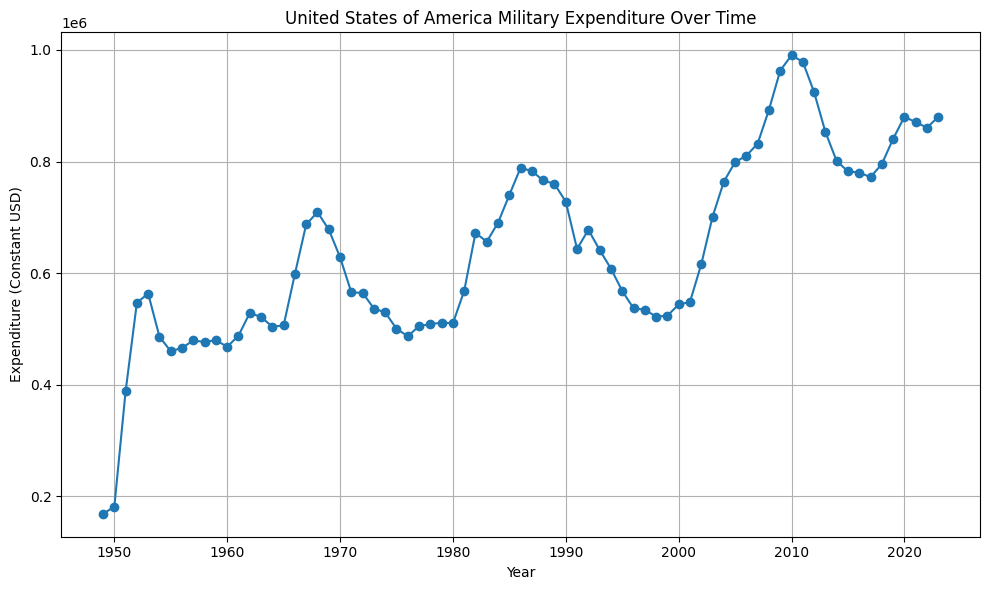

In [48]:
# Define the country to inspect
country = "United States of America"
country_data = df[df['Country'] == country]

if not country_data.empty:
    plt.figure(figsize=(10, 6))
    plt.plot(country_data['Year'], country_data['Expenditure'], marker='o')
    plt.title(f"{country} Military Expenditure Over Time")
    plt.xlabel("Year")
    plt.ylabel("Expenditure (Constant USD)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print(f"No data found for {country}")

## 4. Save the Validated Data

After exploring and validating the data, we save it as a new CSV file that can be used by your backend API and webpage.

In [ ]:
df.to_csv('data/sipri_tidy_validated.csv', index=False)
print("Validated data saved to 'data/sipri_tidy_validated.csv'")